<a href="https://colab.research.google.com/github/maulanafaiz122/PPW-A-7/blob/main/P_2_crawling_berita.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tugas Pertemuan 2 - Pre-Processing Data Berita detik.com

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import time


# Mendefinisikan list untuk menyimpan data yang diambil
judul = []
isi = []
tanggal = []
url_list = []
kategori_list = []

# Fungsi untuk mengambil data dari halaman web Detik.com
def get_data(url, kategori, max_articles):
    try:
        response = requests.get(url)
        response.raise_for_status()
    except requests.exceptions.RequestException as e:
        print(f"Request failed: {e}")
        return

    soup = BeautifulSoup(response.content, "html.parser")
    articles = soup.find_all("article", class_="list-content__item")

    for article in articles:
        if len(judul) >= max_articles:
            return

        try:
            link = article.find("a")["href"]
            article_response = requests.get(link)
            article_response.raise_for_status()
        except (requests.exceptions.RequestException, TypeError) as e:
            print(f"Request for article failed: {e}")
            continue

        article_soup = BeautifulSoup(article_response.content, "html.parser")
        title_element = article_soup.find("h1", class_="detail__title")
        title = title_element.text.strip() if title_element else "Title Not Found"
        date_element = article_soup.find("div", class_="detail__date")
        date = date_element.text.strip() if date_element else "Date Not Found"
        content_element = article_soup.find("div", class_="detail__body-text")
        content = content_element.text.strip() if content_element else "Content Not Found"

        judul.append(title)
        tanggal.append(date)
        isi.append(content)
        url_list.append(link)
        kategori_list.append(kategori)

        print(title)
        time.sleep(1)  # Menambahkan jeda waktu 1 detik antara permintaan artikel

# Membuat list url dan kategori yang akan di-crawl
base_urls = ["https://food.detik.com/indeks"]
categories = ["Food"]

max_articles = 10

# Melakukan iterasi untuk setiap url dan kategori
for base_url, category in zip(base_urls, categories):
    if len(judul) >= max_articles:
        break

    # Looping untuk beralih halaman
    for page in range(1, 4):
        if len(judul) >= max_articles:
            break

        url = f"{base_url}/{page}"
        get_data(url, category, max_articles)
        time.sleep(2)  # Menambahkan jeda waktu 2 detik antara permintaan halaman

# Membuat dataframe dari list data
df = pd.DataFrame({"judul": judul, "isi": isi, "tanggal": tanggal, "kategori": kategori_list})

# Menyimpan dataframe ke file csv
df.to_csv("data_berita_detik.csv", index=False)

Potret Kulineran Maarten Paes, Kiper Timnas Indonesia yang Jadi Sorotan
Influencer Makan di Resto Michelin Habiskan Rp 15,4 Juta dan Berakhir Kecewa
Salut! Remaja Difabel Semangat Jualan Minuman dan Banjir Pujian
Remaja Ini Dipaksa Jualan Makanan, Dagangannya Malah Laris Manis
Makanan di Luar Angkasa Disebut Hambar Rasanya, Ini Penyebabnya
Aksi Bule Saat Pesan Makanan Via Ojol, Kocak hingga Bikin Sedih
Miris! Nasi Kotak Atlet PON Aceh-Sumut Terlalu Sederhana
Pempek dan Siomay Jadi Jajanan Kaki Lima Terenak di Dunia
Nyeleneh! Netizen Ini Bikin Tutup Botol Asam Padeh, Begini Tampilannya!
Cicip Makanan 'First Class' di Kereta India, Influencer Ini Puas!


**CLEANING**


---



**Cleaning Data** adalah proses pemrosesan teks awal  yang bertujuan untuk membersihkan  data  teks dari elemen yang tidak perlu atau mengganggu, seperti:
- Tanda baca
(punctuation) titik, koma, tanda seru
- Tag
- URL
- Simbol-simbol
- Emoticon
- Angka random

In [7]:
import re
import string
import nltk

def remove_url(ulasan):
  url = re.compile(r'https?://\S+|www\.S+')
  return url.sub(r'', ulasan)

def remove_html(ulasan):
  html = re.compile(r'<.#?>')
  return html.sub(r'', ulasan)

def remove_emoji(ulasan):
  emoji_pattern = re.compile("["
      u"\U0001F600-\U0001F64F"
      u"\U0001F300-\U0001F5FF"
      u"\U0001F680-\U0001F6FF"
      u"\U0001F1E0-\U0001F1FF""]+", flags=re.UNICODE)
  return emoji_pattern.sub(r'', ulasan)

def remove_numbers(ulasan):
  ulasan = re.sub(r'\d+', '', ulasan)
  return ulasan

def remove_symbols(ulasan):
  ulasan = re.sub(r'[^a-zA-Z0-9\s]', '', ulasan) #menghapus semua simbol
  return ulasan

df['cleansing'] = df['isi'].apply(lambda x: remove_url(x))
df['cleansing'] = df['cleansing'].apply(lambda x: remove_html(x))
df['cleansing'] = df['cleansing'].apply(lambda x: remove_emoji(x))
df['cleansing'] = df['cleansing'].apply(lambda x: remove_symbols(x))
df['cleansing'] = df['cleansing'].apply(lambda x: remove_numbers(x))

df.head(6)

,judul,isi,tanggal,kategori,cleansing
0,"Potret Kulineran Maarten Paes, Kiper Timnas In...",Jakarta - Maarten Paes tampil impresif saat In...,"Rabu, 11 Sep 2024 21:00 WIB",Food,Jakarta Maarten Paes tampil impresif saat Ind...
1,Influencer Makan di Resto Michelin Habiskan Rp...,"Jakarta - Habiskan uang Rp 15,4 juta, influenc...","Rabu, 11 Sep 2024 19:30 WIB",Food,Jakarta Habiskan uang Rp juta influencer ini...
2,Salut! Remaja Difabel Semangat Jualan Minuman ...,Jakarta - Seorang remaja difabel berhasil meny...,"Rabu, 11 Sep 2024 19:00 WIB",Food,Jakarta Seorang remaja difabel berhasil menye...
3,"Remaja Ini Dipaksa Jualan Makanan, Dagangannya...",Jakarta - Awalnya remaja ini dipaksa untuk jua...,"Rabu, 11 Sep 2024 18:30 WIB",Food,Jakarta Awalnya remaja ini dipaksa untuk jual...
4,Makanan di Luar Angkasa Disebut Hambar Rasanya...,Jakarta - Pernah membayangkan bagaimana kehidu...,"Rabu, 11 Sep 2024 18:00 WIB",Food,Jakarta Pernah membayangkan bagaimana kehidup...
5,"Aksi Bule Saat Pesan Makanan Via Ojol, Kocak h...",Jakarta -\n \n Pesan makanan via...,"Rabu, 11 Sep 2024 17:30 WIB",Food,Jakarta \n \n Pesan makanan via ...


**CASE FOLDING**


---



**Casefolding** adalah langkah prapemrosesan yang mencakup mengubah semua karakter dalam teks menjadi huruf kecil. Tujuan dari casefolding adalah
adalah  untuk menghilangkan ambiguitas yang mungkin timbul akibat perbedaan huruf besar  dan kecil.
Misalnya, kata yang sama tetapi ditulis dengan huruf besar atau kecil akan  dianggap sebagai entitas yang berbeda.

In [8]:
def case_folding(text):
    if isinstance(text, str):
      lowercase_text = text.lower()
      return lowercase_text
    else :
      return text

df ['case_folding'] = df['cleansing'].apply(case_folding)

df.head(6)

,judul,isi,tanggal,kategori,cleansing,case_folding
0,"Potret Kulineran Maarten Paes, Kiper Timnas In...",Jakarta - Maarten Paes tampil impresif saat In...,"Rabu, 11 Sep 2024 21:00 WIB",Food,Jakarta Maarten Paes tampil impresif saat Ind...,jakarta maarten paes tampil impresif saat ind...
1,Influencer Makan di Resto Michelin Habiskan Rp...,"Jakarta - Habiskan uang Rp 15,4 juta, influenc...","Rabu, 11 Sep 2024 19:30 WIB",Food,Jakarta Habiskan uang Rp juta influencer ini...,jakarta habiskan uang rp juta influencer ini...
2,Salut! Remaja Difabel Semangat Jualan Minuman ...,Jakarta - Seorang remaja difabel berhasil meny...,"Rabu, 11 Sep 2024 19:00 WIB",Food,Jakarta Seorang remaja difabel berhasil menye...,jakarta seorang remaja difabel berhasil menye...
3,"Remaja Ini Dipaksa Jualan Makanan, Dagangannya...",Jakarta - Awalnya remaja ini dipaksa untuk jua...,"Rabu, 11 Sep 2024 18:30 WIB",Food,Jakarta Awalnya remaja ini dipaksa untuk jual...,jakarta awalnya remaja ini dipaksa untuk jual...
4,Makanan di Luar Angkasa Disebut Hambar Rasanya...,Jakarta - Pernah membayangkan bagaimana kehidu...,"Rabu, 11 Sep 2024 18:00 WIB",Food,Jakarta Pernah membayangkan bagaimana kehidup...,jakarta pernah membayangkan bagaimana kehidup...
5,"Aksi Bule Saat Pesan Makanan Via Ojol, Kocak h...",Jakarta -\n \n Pesan makanan via...,"Rabu, 11 Sep 2024 17:30 WIB",Food,Jakarta \n \n Pesan makanan via ...,jakarta \n \n pesan makanan via ...


**TOKENIZATION**


---



**Tokenization atau Tokenisasi** Tujuannya adalah untuk mengelompokkan kemunculan  kata dalam proses berikut.
Lebih jelasnya untuk memecah teks menjadi unit terkecil yang dapat
berupa kata,frasa atau karakter terpisah.

In [9]:
from nltk.tokenize import word_tokenize
def tokenize(text):
    tokens = text.split()
    return tokens

df['tokenize'] = df['case_folding'].apply(tokenize)

df.head(6)

,judul,isi,tanggal,kategori,cleansing,case_folding,tokenize
0,"Potret Kulineran Maarten Paes, Kiper Timnas In...",Jakarta - Maarten Paes tampil impresif saat In...,"Rabu, 11 Sep 2024 21:00 WIB",Food,Jakarta Maarten Paes tampil impresif saat Ind...,jakarta maarten paes tampil impresif saat ind...,"[jakarta, maarten, paes, tampil, impresif, saa..."
1,Influencer Makan di Resto Michelin Habiskan Rp...,"Jakarta - Habiskan uang Rp 15,4 juta, influenc...","Rabu, 11 Sep 2024 19:30 WIB",Food,Jakarta Habiskan uang Rp juta influencer ini...,jakarta habiskan uang rp juta influencer ini...,"[jakarta, habiskan, uang, rp, juta, influencer..."
2,Salut! Remaja Difabel Semangat Jualan Minuman ...,Jakarta - Seorang remaja difabel berhasil meny...,"Rabu, 11 Sep 2024 19:00 WIB",Food,Jakarta Seorang remaja difabel berhasil menye...,jakarta seorang remaja difabel berhasil menye...,"[jakarta, seorang, remaja, difabel, berhasil, ..."
3,"Remaja Ini Dipaksa Jualan Makanan, Dagangannya...",Jakarta - Awalnya remaja ini dipaksa untuk jua...,"Rabu, 11 Sep 2024 18:30 WIB",Food,Jakarta Awalnya remaja ini dipaksa untuk jual...,jakarta awalnya remaja ini dipaksa untuk jual...,"[jakarta, awalnya, remaja, ini, dipaksa, untuk..."
4,Makanan di Luar Angkasa Disebut Hambar Rasanya...,Jakarta - Pernah membayangkan bagaimana kehidu...,"Rabu, 11 Sep 2024 18:00 WIB",Food,Jakarta Pernah membayangkan bagaimana kehidup...,jakarta pernah membayangkan bagaimana kehidup...,"[jakarta, pernah, membayangkan, bagaimana, keh..."
5,"Aksi Bule Saat Pesan Makanan Via Ojol, Kocak h...",Jakarta -\n \n Pesan makanan via...,"Rabu, 11 Sep 2024 17:30 WIB",Food,Jakarta \n \n Pesan makanan via ...,jakarta \n \n pesan makanan via ...,"[jakarta, pesan, makanan, via, aplikasi, ojek,..."


**FILTERING/STOPWORD REMOVAL**


---



Tahap **Stopword Removal** yaitu langkah untuk memilih kata-kata yang  dianggap tidak penting atau  tidak relevan, untuk mengetahui kata-kata mana yang tidak relevan berdasarkan daftar stopword removal yang digunakan.



In [10]:
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = stopwords.words('indonesian')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [12]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

Pada tahap ini menggunakan library **NLTK stopword removal bahasa indonesia**.Contoh stopwords dalam bahasa Indonesia adalah “yang” , “bahwa”, “itu”, ”ini”, “dengan” dan sebagainya.

In [13]:
def remove_stopwords(text):
  return [word for word in text if word not in stop_words]

df['Filtering/stopword removal'] = df['tokenize'].apply(lambda x: ' '.join(remove_stopwords(x)))

df.head(6)

,judul,isi,tanggal,kategori,cleansing,case_folding,tokenize,Filtering/stopword removal
0,"Potret Kulineran Maarten Paes, Kiper Timnas In...",Jakarta - Maarten Paes tampil impresif saat In...,"Rabu, 11 Sep 2024 21:00 WIB",Food,Jakarta Maarten Paes tampil impresif saat Ind...,jakarta maarten paes tampil impresif saat ind...,"[jakarta, maarten, paes, tampil, impresif, saa...",jakarta maarten paes tampil impresif indonesia...
1,Influencer Makan di Resto Michelin Habiskan Rp...,"Jakarta - Habiskan uang Rp 15,4 juta, influenc...","Rabu, 11 Sep 2024 19:30 WIB",Food,Jakarta Habiskan uang Rp juta influencer ini...,jakarta habiskan uang rp juta influencer ini...,"[jakarta, habiskan, uang, rp, juta, influencer...",jakarta habiskan uang rp juta influencer menga...
2,Salut! Remaja Difabel Semangat Jualan Minuman ...,Jakarta - Seorang remaja difabel berhasil meny...,"Rabu, 11 Sep 2024 19:00 WIB",Food,Jakarta Seorang remaja difabel berhasil menye...,jakarta seorang remaja difabel berhasil menye...,"[jakarta, seorang, remaja, difabel, berhasil, ...",jakarta remaja difabel berhasil menyentuh hati...
3,"Remaja Ini Dipaksa Jualan Makanan, Dagangannya...",Jakarta - Awalnya remaja ini dipaksa untuk jua...,"Rabu, 11 Sep 2024 18:30 WIB",Food,Jakarta Awalnya remaja ini dipaksa untuk jual...,jakarta awalnya remaja ini dipaksa untuk jual...,"[jakarta, awalnya, remaja, ini, dipaksa, untuk...",jakarta remaja dipaksa jualan makanan sang dag...
4,Makanan di Luar Angkasa Disebut Hambar Rasanya...,Jakarta - Pernah membayangkan bagaimana kehidu...,"Rabu, 11 Sep 2024 18:00 WIB",Food,Jakarta Pernah membayangkan bagaimana kehidup...,jakarta pernah membayangkan bagaimana kehidup...,"[jakarta, pernah, membayangkan, bagaimana, keh...",jakarta membayangkan kehidupan astronot angkas...
5,"Aksi Bule Saat Pesan Makanan Via Ojol, Kocak h...",Jakarta -\n \n Pesan makanan via...,"Rabu, 11 Sep 2024 17:30 WIB",Food,Jakarta \n \n Pesan makanan via ...,jakarta \n \n pesan makanan via ...,"[jakarta, pesan, makanan, via, aplikasi, ojek,...",jakarta pesan makanan via aplikasi ojek online...


In [14]:
df.to_csv("/content/drive/My Drive/PPW-A/report/Tugas-PPW-A/hasil_preprocesing.csv",encoding='utf8', index=False)

---

**TERM FREQUENCY AND INVERSE DOCUMENT FREQUNENCY (TF-IDF)**

---

**Count Vectorizer** Ubah dokumen teks apa pun menjadi vektor yang berisi  frekuensi  setiap kata dalam dokumen. Pembobotan TF-IDF menghitung nilai bobot untuk setiap kata di setiap dokumen. Ini dibagi menjadi dua proses

yaitu **TF** dan **IDF**.

**TF (Term Frequency)** menghitung  kemunculan setiap kata dalam dokumen,  dan jika sebuah kata memiliki kemunculan  terbanyak,  kata tersebut memiliki nilai tertinggi.

**IDF (Inverse Document Frequency)** Hitung jumlah dokumen untuk setiap kata dengan nilai tertinggi yang  jarang muncul dalam dokumen.
 Jika kata  sering muncul di dokumen, hasilnya akan bernilai kecil.

In [15]:
import pandas as pd
data = pd.read_csv("/content/drive/My Drive/PPW-A/report/Tugas-PPW-A/hasil_preprocesing.csv", sep=",")

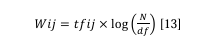

Keterangan :
- 𝑓𝑖,𝑗 : jumlah kata i muncul dalam dokumen j
- 𝑓𝑖 : jumlah dokumen yang mengandung I
- N : total seluruh dokumen.

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Menginisialisasi TfidfVectorizer tanpa max_features dan stop_words
vectorizer = TfidfVectorizer()

# Menghitung TF-IDF untuk kolom 'isi' dari dataframe
tfidf_matrix = vectorizer.fit_transform(df['Filtering/stopword removal'])

In [17]:
# Mengubah hasilnya menjadi DataFrame
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=vectorizer.get_feature_names_out())
tfidf_df.head(10)

,aceh,acehdaging,acehsumut,acehtiktok,acehviral,adaptasi,advertisement,ahli,air,aja,...,wanita,warga,warisan,willymenunya,wisata,with,wob,world,ya,ymsodi
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.035018,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.017509,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.032760,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.016380,0.000000,0.000000,0.000000,0.040449
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.041245,0.000000,0.000000,0.000000,...,0.10185,0.000000,0.000000,0.000000,0.000000,0.020622,0.050925,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.031977,0.000000,0.000000,0.037616,0.030466,0.037616,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.015233,0.000000,0.000000,0.000000,0.000000
5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.027263,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.033662,0.013632,0.000000,0.000000,0.000000,0.000000
6,0.044452,0.044452,0.226730,0.044452,0.044452,0.000000,0.036002,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.044452,0.000000,0.018001,0.000000,0.000000,0.000000,0.000000
7,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.027892,0.000000,0.000000,0.000000,...,0.00000,0.029275,0.034438,0.000000,0.000000,0.013946,0.000000,0.034438,0.000000,0.000000
8,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.034448,0.000000,0.036157,0.085066,...,0.00000,0.036157,0.000000,0.000000,0.000000,0.017224,0.000000,0.000000,0.042533,0.000000
9,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.025974,0.000000,0.027263,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.012987,0.000000,0.000000,0.000000,0.000000
